<a href="https://colab.research.google.com/github/Aman-Gautam007/Target-Marketing-using-ML/blob/main/Target_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing marketing strategy by performing customer segmentation**

*Marketing is crucial for the growth and sustainability of any business. Marketers can help build the company's brand, engage customers, grow revenue, and increase sales.*

* Growth; Marketers empower business growth through reaching new customers
* Education; Marketers educate and communicate value proposition to customers
* Drive sales; Marketers drive sales and traffic to products/services
* Engagement; Marketers engage customers and understand their needs

*One of the critical pain points for marketers is to know their customers and identify their needs.  By understanding the customer, marketers can launch a targeted marketing campaign tailored to specific needs.  If data about the customers is available, data science can be applied to perform market segmentation.*

*In this project, the objective is to divide the customers into different distinctive groups.*

# Importing the libraries and data

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch

In [2]:
raw_data = pd.read_csv('Marketing_data.csv')

*Let's take a look into the provided dataset regarding the bank customers' creditcards*

* CUSTID: Identification of Credit Card holder 
* BALANCE: Balance amount left in customer's account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
* CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user  
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user



In [3]:
raw_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
raw_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Preprocessing the data

In [6]:
data = raw_data.copy()

In [7]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


*Verifying if there is any missing value in the dataset:*

<Axes: >

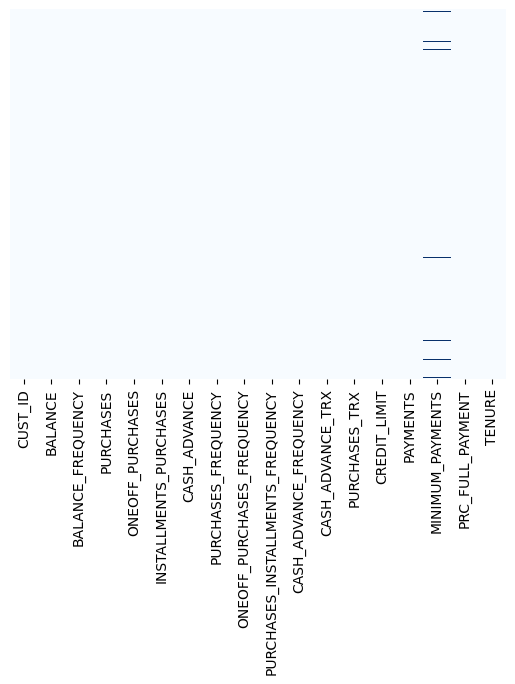

In [8]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

*As it can be seen, it seems that there are some missing cells in 'MINIMUM_PAYMENT' column  only. Let's verify with another method.*

In [9]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

*As seen in the table above, there is a missing value in the 'CREDIT_LIMIT' column as well! Given the slightly different results, it can be concluded that data visualization is insightful mainly to demonstrate the overall trends and may not necessarily be suitable for the detail.*

*We have several options to tackle this issue, such as deleting the whole rows associated with the missing cells or filling the blank values with the mean or median of the column. Choosing mean or median will be more beneficial as we won't loose the other useful information in those rows.*

checking the skewness of dataset

In [10]:
data.skew()

<ipython-input-10-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

Since the dataset is found to be skewed, we shall use the median to fill the missing values as the median is more resistant to outliers than the mean

In [11]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

*Verifying if filling in the blanks was successful:*

In [12]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

*Checking if there are any duplicates in the dataset:*

In [13]:
data.duplicated().sum()

0

*The 'CUST_ID' column presence is unnecessary as it does not provide helpful information. Thus, we shall drop it.*

In [14]:
data.drop("CUST_ID", axis = 1, inplace= True)

detection of outliers in the dataset

<Axes: >

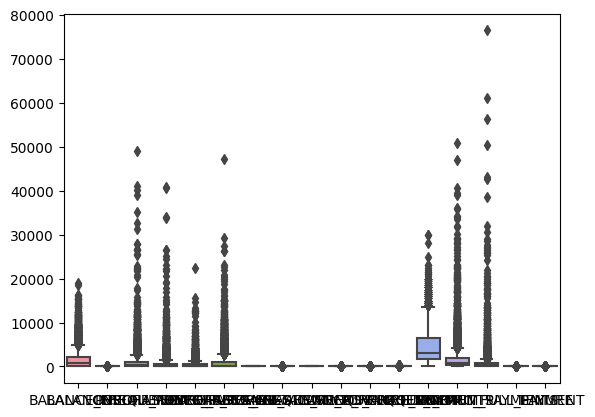

In [15]:
sns.boxplot(data=data)

Since the data is skewed, a common approach to detecting outliers is to use the interquartile range (IQR) method. The IQR method is based on the interquartile range, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.

In [16]:
# Calculate the interquartile range for each column
Q1 = np.percentile(data, 25, axis=0)
Q3 = np.percentile(data, 75, axis=0)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers as values outside the lower and upper bounds
outliers = np.where((data < lower_bound) | (data > upper_bound))

print("Outliers detected in the following rows and columns: ")
print(outliers)

Outliers detected in the following rows and columns: 
(array([   1,    2,    3, ..., 8948, 8949, 8949]), array([ 5,  7,  1, ..., 16,  1, 16]))


removing the outliers from the dataset - we remove the outliers from the data by selecting only the rows that fall within the range defined by the lower and upper bounds.

In [17]:
# Remove the outliers from the data
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [18]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.0,12


In [19]:
data.shape

(2986, 17)

In [20]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2986 entries, 0 to 8760
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           2986 non-null   float64
 1   BALANCE_FREQUENCY                 2986 non-null   float64
 2   PURCHASES                         2986 non-null   float64
 3   ONEOFF_PURCHASES                  2986 non-null   float64
 4   INSTALLMENTS_PURCHASES            2986 non-null   float64
 5   CASH_ADVANCE                      2986 non-null   float64
 6   PURCHASES_FREQUENCY               2986 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        2986 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  2986 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            2986 non-null   float64
 10  CASH_ADVANCE_TRX                  2986 non-null   int64  
 11  PURCHASES_TRX                     2986 non-null   int64  
 12  CREDIT

# Data Visualization

<ipython-input-22-8bef77e202c8>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data.columns[i]])


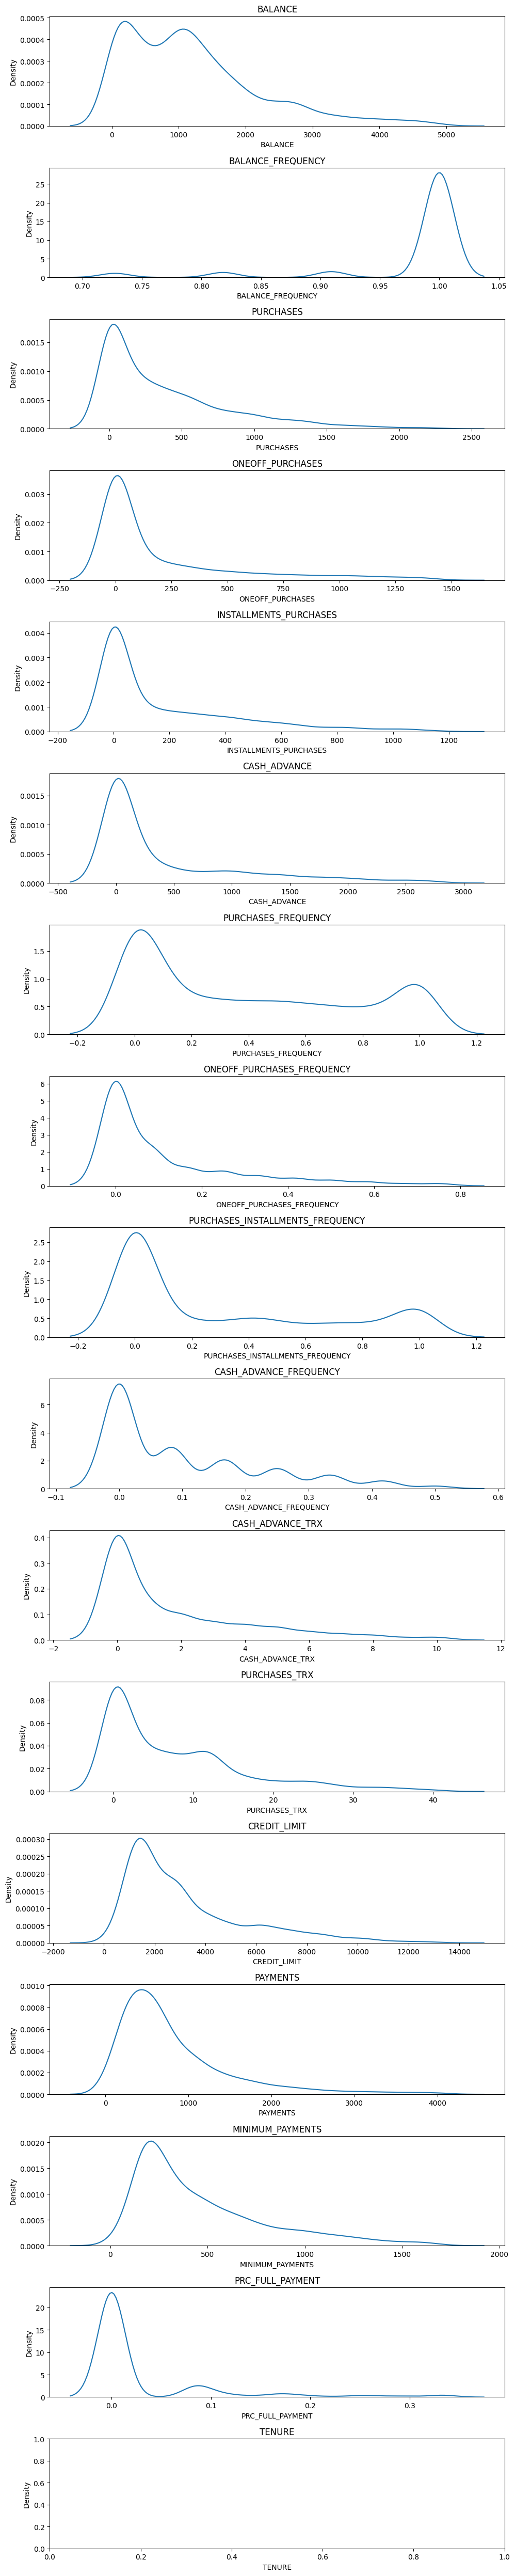

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
  plt.subplot(17, 1, i+1)
  sns.kdeplot(data[data.columns[i]])
  plt.title(data.columns[i])

plt.tight_layout()

*KDE plot hs been applied to each column and we can see the distribution of the values in each column.*

* Mean of balance is 1500 dollar
* 'Balance_Frequency' for most customers is updated frequently ~1
* For 'PURCHASES_FREQUENCY', there are two distinct group of customers
* For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
* Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
* Credit limit average is around $4500
* Most customers are ~11 years tenure

In [23]:
correlations = data.corr()
correlations

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.276731,-0.033514,0.038095,-0.107975,0.369648,-0.204828,0.013119,-0.198210,0.347474,0.320369,-0.109097,0.319224,0.206852,0.777795,-0.359306,NaN
BALANCE_FREQUENCY,0.276731,1.000000,0.002945,-0.007173,0.014213,0.025530,0.016968,0.007098,0.030386,0.107823,0.090552,0.046772,-0.034599,-0.080565,0.243374,-0.274467,NaN
PURCHASES,-0.033514,0.002945,1.000000,0.820132,0.668890,-0.204372,0.603566,0.614576,0.451298,-0.256504,-0.222568,0.711286,0.210964,0.209851,0.014150,0.089089,NaN
ONEOFF_PURCHASES,0.038095,-0.007173,0.820132,1.000000,0.123603,-0.127490,0.241719,0.750647,0.014181,-0.146878,-0.121830,0.410570,0.213604,0.188254,0.013433,-0.000057,NaN
INSTALLMENTS_PURCHASES,-0.107975,0.014213,0.668890,0.123603,1.000000,-0.189187,0.733187,0.091334,0.764561,-0.253569,-0.227478,0.700665,0.088470,0.119063,0.007852,0.154195,NaN
CASH_ADVANCE,0.369648,0.025530,-0.204372,-0.127490,-0.189187,1.000000,-0.309674,-0.153923,-0.260146,0.643522,0.682554,-0.242235,0.082589,0.323793,0.218897,-0.038371,NaN
PURCHASES_FREQUENCY,-0.204828,0.016968,0.603566,0.241719,0.733187,-0.309674,1.000000,0.330529,0.930434,-0.376323,-0.331975,0.847666,0.034637,0.014598,-0.044573,0.203334,NaN
ONEOFF_PURCHASES_FREQUENCY,0.013119,0.007098,0.614576,0.750647,0.091334,-0.153923,0.330529,1.000000,0.024760,-0.153920,-0.132280,0.490293,0.151794,0.123007,0.013302,0.014170,NaN
PURCHASES_INSTALLMENTS_FREQUENCY,-0.198210,0.030386,0.451298,0.014181,0.764561,-0.260146,0.930434,0.024760,1.000000,-0.319359,-0.285371,0.766341,-0.002568,-0.005326,-0.039322,0.192011,NaN
CASH_ADVANCE_FREQUENCY,0.347474,0.107823,-0.256504,-0.146878,-0.253569,0.643522,-0.376323,-0.153920,-0.319359,1.000000,0.910727,-0.281859,-0.043929,0.173168,0.223086,-0.116548,NaN


<Axes: >

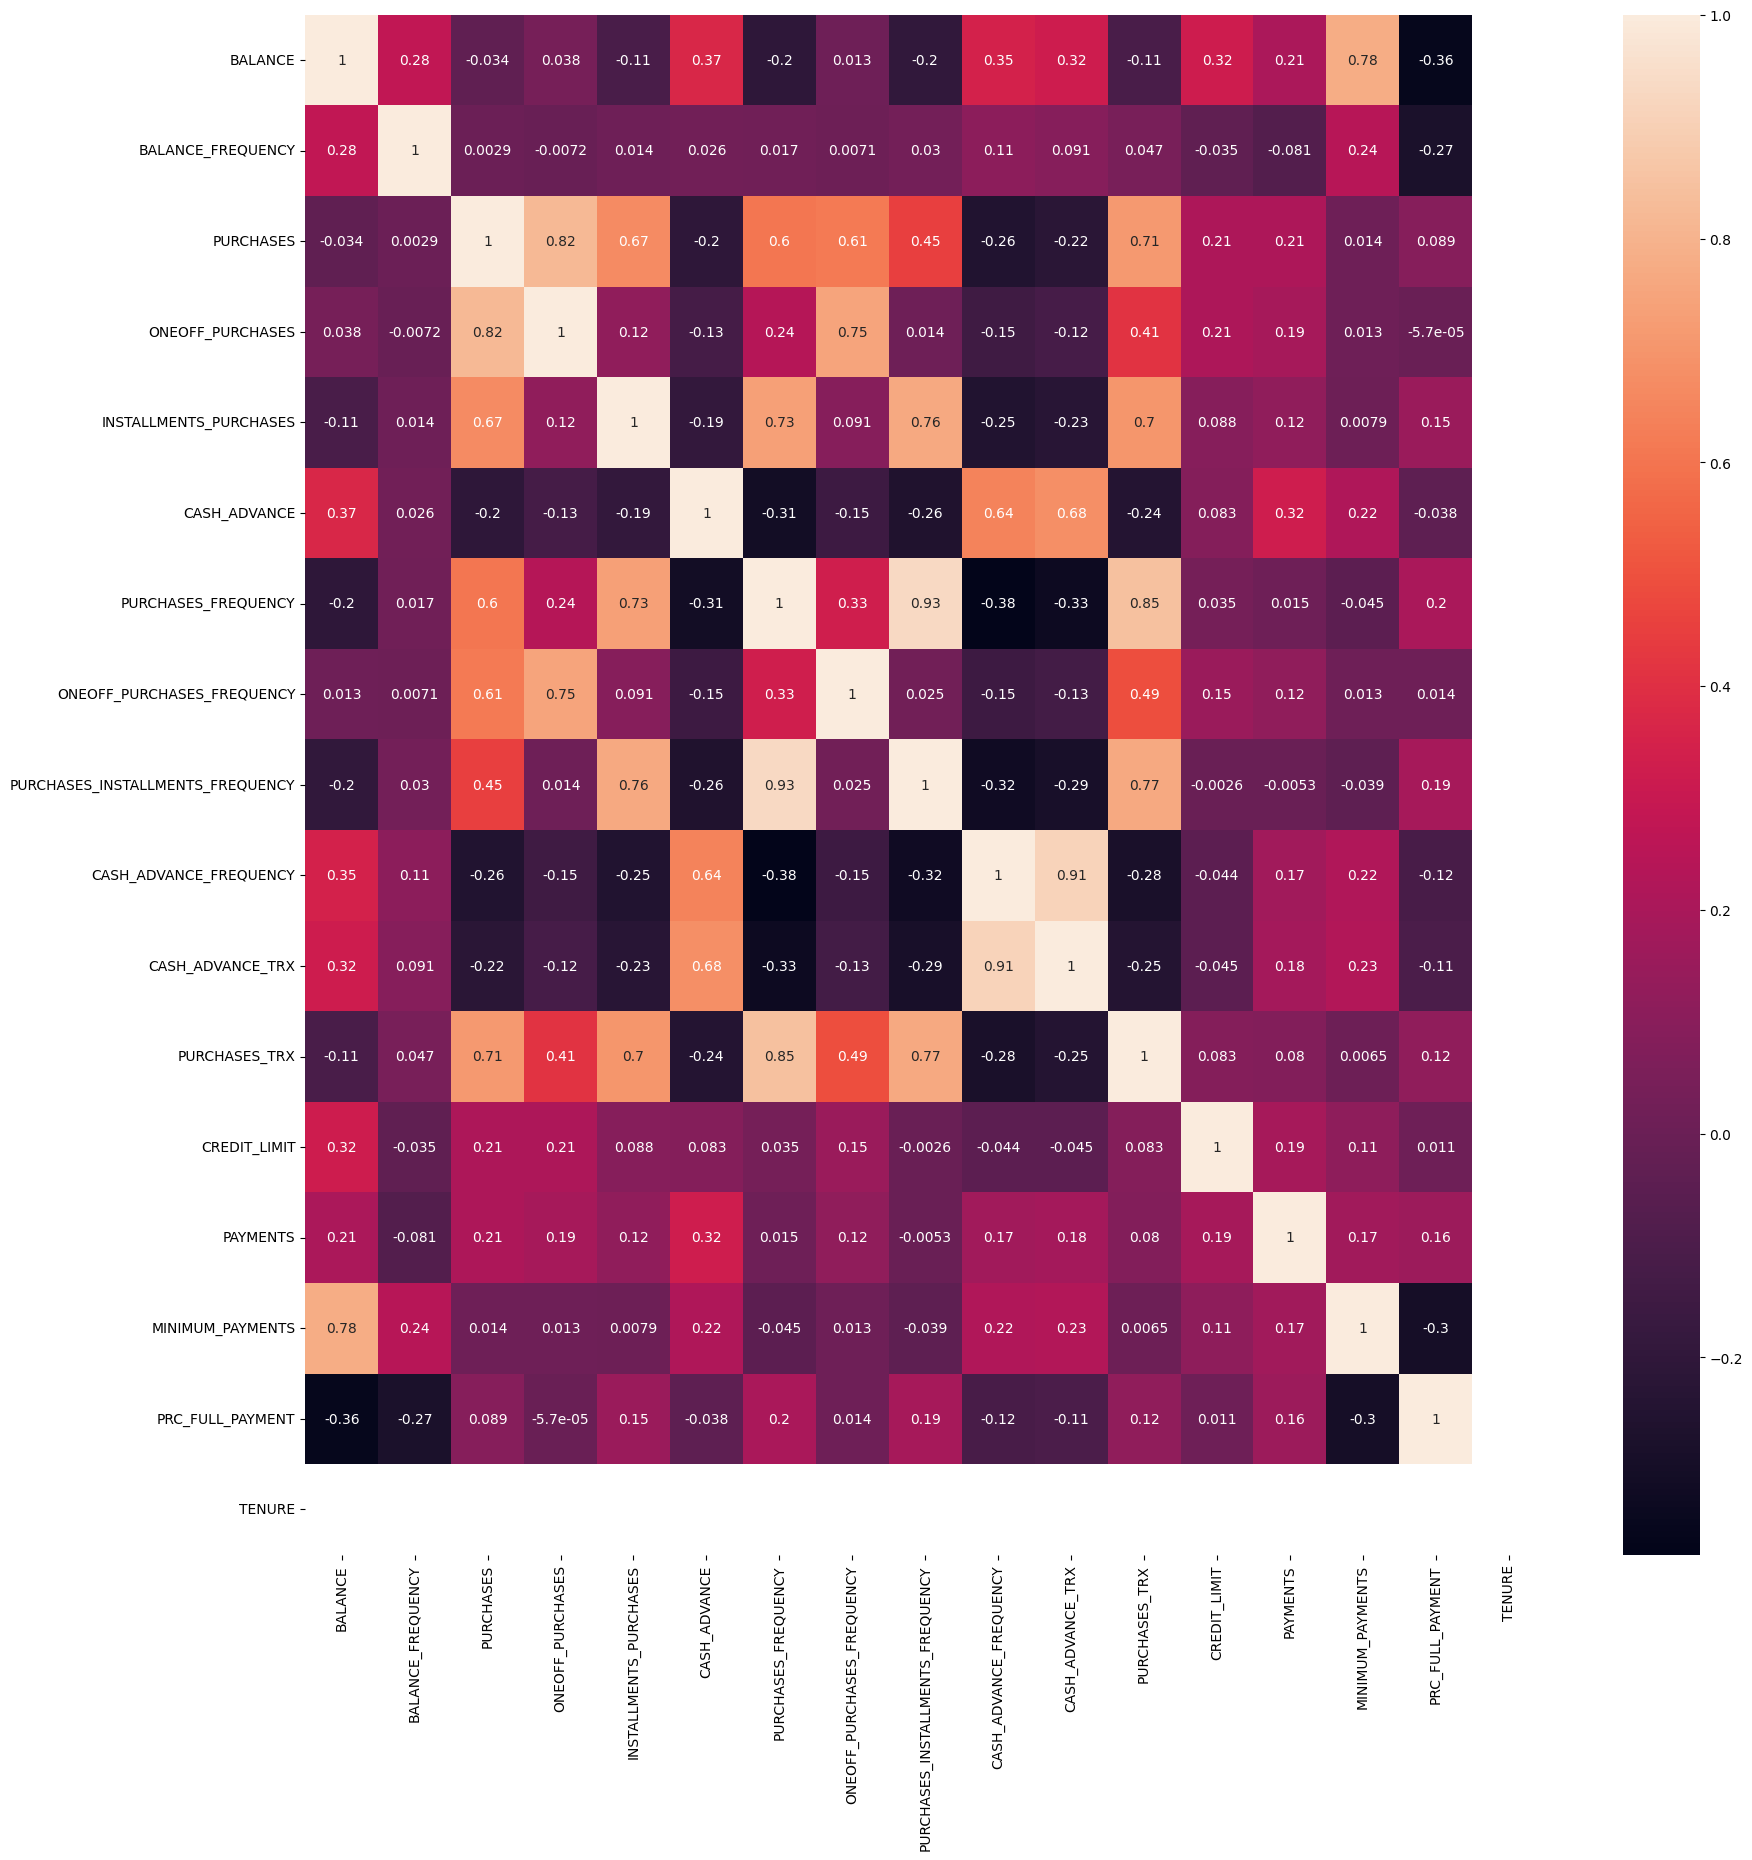

In [24]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

*The heatmap shows that:*

* 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
* Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

*As in general, removing one of the correlated variables before training the model benefits the learning process and can result in a similar performance to the full model, it is possible to drop some of the columns before applying the ML model.*

**Scaling**

In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [26]:
data_scaled

array([[-1.1329738 , -2.60151595, -0.63243332, ..., -0.94061746,
        -0.41509199,  0.        ],
       [-0.37491106,  0.33984211, -0.81138652, ..., -0.63474837,
        -0.41509199,  0.        ],
       [ 0.60674586,  0.33984211,  0.13566809, ...,  0.19976408,
        -0.41509199,  0.        ],
       ...,
       [-1.1568555 , -1.13083692,  0.14761333, ..., -1.08059612,
         4.44571249,  0.        ],
       [-1.1071364 ,  0.33984211, -0.18257111, ..., -0.86038532,
         3.95963641,  0.        ],
       [-0.87317302,  0.33984211,  1.2019497 , ..., -0.82513724,
        -0.41509199,  0.        ]])

# Applying KMEANS clustering

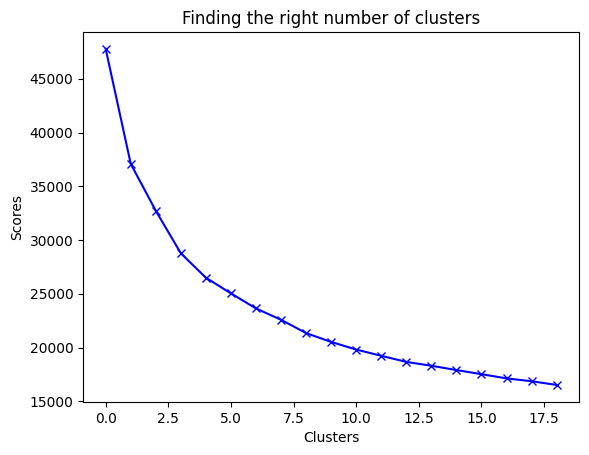

In [27]:
scores_1 = []

for i in range(1, 20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(data_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
However, the values does not reduce linearly until 8th cluster. 
Let's choose the number of clusters to be 8.

In [28]:
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [29]:
kmeans.cluster_centers_

array([[-0.96693317, -3.15961978, -0.01957275, -0.02966004,  0.0036004 ,
        -0.40697023,  0.03977942, -0.01379188, -0.03244965, -0.57756898,
        -0.54079894, -0.14223819,  0.21140574, -0.11625158, -0.85454658,
         1.06405753,  0.        ],
       [ 0.11313543,  0.23381641, -0.69464951, -0.45798318, -0.61085102,
         0.73387513, -0.85599054, -0.46358838, -0.70649717,  1.36148216,
         1.31059384, -0.7220894 , -0.36384123, -0.28918783, -0.08669755,
        -0.32478694,  0.        ],
       [ 0.0455869 ,  0.19503679,  0.95207639,  1.58220357, -0.40071787,
        -0.40555605,  0.20457007,  1.56466267, -0.47589013, -0.4275232 ,
        -0.39952029,  0.29416228,  0.17605804,  0.04582956,  0.06653166,
        -0.16639303,  0.        ],
       [ 0.21823972,  0.22246397,  2.33292459,  1.82067289,  1.68005438,
        -0.22672252,  1.25649209,  1.59024455,  1.15023407, -0.18816152,
        -0.18530862,  1.98456521,  0.69573637,  0.75700391,  0.14112815,
         0.12308566

In [30]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data.columns])
cluster_centers          

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.966933,-3.159620,-0.019573,-0.029660,0.003600,-0.406970,0.039779,-0.013792,-0.032450,-0.577569,-0.540799,-0.142238,0.211406,-0.116252,-0.854547,1.064058,0.0
1,0.113135,0.233816,-0.694650,-0.457983,-0.610851,0.733875,-0.855991,-0.463588,-0.706497,1.361482,1.310594,-0.722089,-0.363841,-0.289188,-0.086698,-0.324787,0.0
2,0.045587,0.195037,0.952076,1.582204,-0.400718,-0.405556,0.204570,1.564663,-0.475890,-0.427523,-0.399520,0.294162,0.176058,0.045830,0.066532,-0.166393,0.0
3,0.218240,0.222464,2.332925,1.820673,1.680054,-0.226723,1.256492,1.590245,1.150234,-0.188162,-0.185309,1.984565,0.695736,0.757004,0.141128,0.123086,0.0
4,-0.466256,0.244343,0.269779,-0.420742,1.015872,-0.470984,1.297303,-0.365198,1.433959,-0.576862,-0.525713,0.862681,-0.226394,-0.218566,-0.154815,0.293998,0.0
5,2.006221,0.293883,-0.479661,-0.328451,-0.406237,1.255599,-0.546587,-0.367082,-0.447087,0.924222,0.924457,-0.477030,0.907219,0.260156,1.727690,-0.415092,0.0
6,-0.030207,-0.376398,-0.487049,-0.302188,-0.453176,1.669297,-0.705417,-0.400420,-0.587091,0.871410,0.929792,-0.615120,-0.035247,2.575525,-0.145218,0.769379,0.0
7,-0.179578,0.297401,-0.592480,-0.388338,-0.524022,-0.432231,-0.657939,-0.332002,-0.575491,-0.388004,-0.432615,-0.620632,-0.222766,-0.448822,-0.216218,-0.292717,0.0


In [31]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,211.048431,0.783683,367.320974,190.050308,177.270667,152.848149,0.406838,0.112820,0.289316,0.027778,0.466667,6.389744,3707.692308,734.035054,169.135754,1.014337e-01,12.0
1,1317.832754,0.993446,67.795209,47.697744,20.097465,894.694076,0.073256,0.035077,0.037016,0.275194,4.955814,1.269767,2313.139535,613.541530,433.432673,6.192730e-03,12.0
2,1248.613392,0.991049,798.433354,725.750800,73.848338,153.767730,0.468205,0.385641,0.123333,0.046923,0.809231,10.243077,3622.000000,846.965266,486.174823,1.705470e-02,12.0
3,1425.536816,0.992744,1411.103850,805.005728,606.098122,270.055995,0.859937,0.390063,0.732003,0.077465,1.328638,25.169014,4881.839522,1342.476783,511.851254,3.690590e-02,12.0
4,724.109463,0.994097,495.703718,60.074919,436.204026,111.222519,0.875135,0.052083,0.838204,0.027868,0.503247,15.262987,2646.347403,662.747499,409.986245,4.862630e-02,12.0
5,3257.743898,0.997159,163.183984,90.747422,72.436563,1233.950094,0.188477,0.051758,0.134115,0.219401,4.019531,3.433594,5394.531250,996.297250,1057.952766,-6.938894e-18,12.0
6,1170.944582,0.955726,159.905974,99.476169,60.429805,1502.961053,0.129329,0.045996,0.081710,0.212662,4.032468,2.214286,3109.740260,2609.533419,413.289581,8.122592e-02,12.0
7,1017.878974,0.997377,113.126763,70.844090,42.307767,136.421933,0.147010,0.057821,0.086052,0.051966,0.728984,2.165621,2655.144291,502.316540,388.851309,8.391930e-03,12.0


* First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104 dollar) and cash advance (303 dollar), Percentage of full payment = 23%
* Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000 dollar) and cash advance (~5000 dollar), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
* Third customer cluster (VIP/Prime): high credit limit 16K dollar and highest percentage of full payment, target for increase credit limit and increase spending habits
* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [32]:
y_kmeans = kmeans.fit_predict(data_scaled)
y_kmeans

array([0, 7, 4, ..., 4, 4, 4], dtype=int32)

In [33]:
data_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)

In [34]:
data_cluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.0,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0,5.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.0,12.0,1.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.0,12.0,4.0
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1.0,0.0,3000.0,805.647974,989.962866,0.0,12.0,7.0
18,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0.0,9.0,13000.0,1720.837373,744.613395,0.0,12.0,0.0
25,169.781679,1.000000,399.60,0.00,399.60,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,3000.0,215.306142,163.005536,0.0,12.0,5.0
26,1615.967240,1.000000,102.00,102.00,0.00,244.840485,0.166667,0.166667,0.000000,0.250000,5.0,2.0,1700.0,890.178845,971.183209,0.0,12.0,7.0
27,125.694817,1.000000,233.28,0.00,233.28,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1000.0,207.773715,164.748819,0.0,12.0,7.0
29,22.063490,1.000000,100.00,0.00,100.00,0.000000,0.416667,0.000000,0.416667,0.000000,0.0,5.0,6900.0,160.767773,159.684442,0.0,12.0,2.0


*Plotting the histogram of various clusters:*

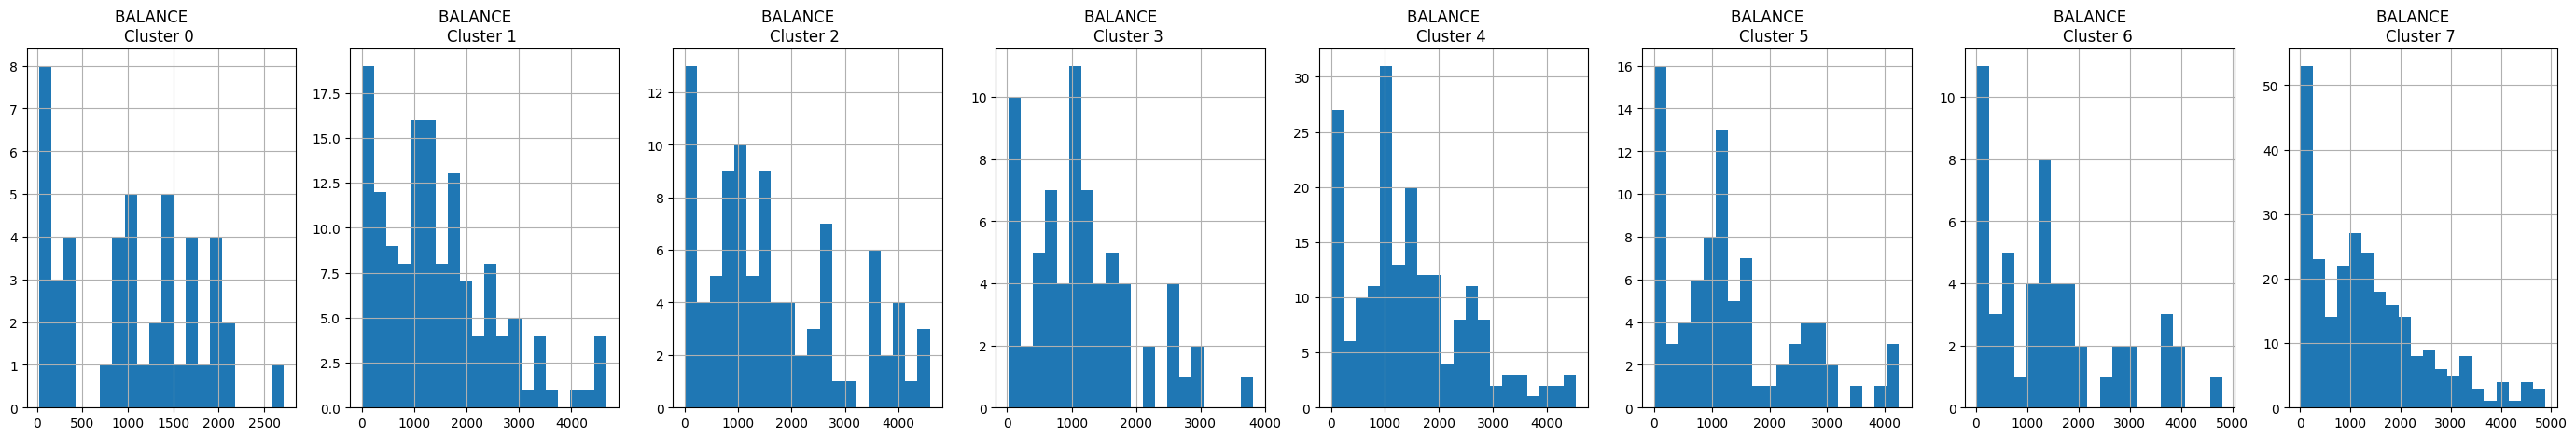

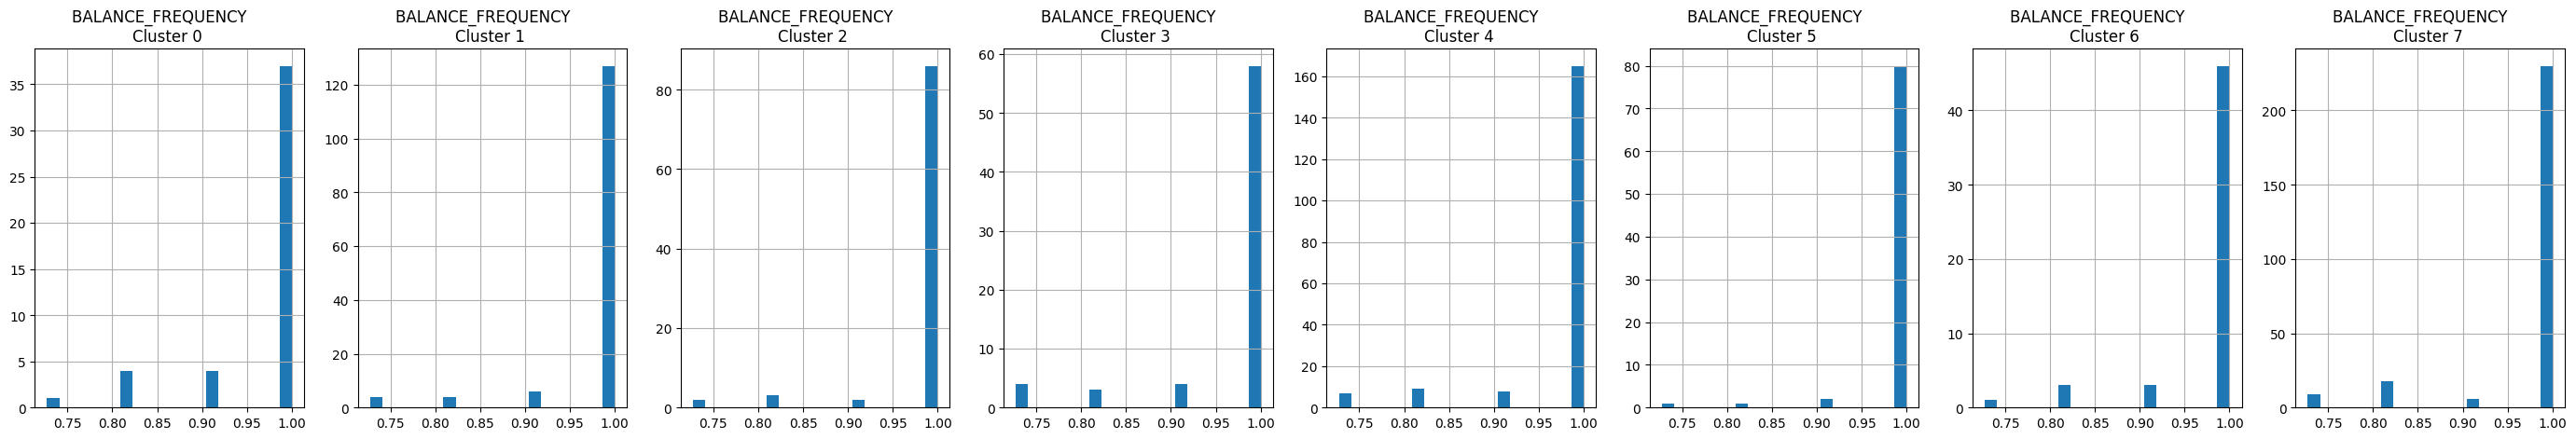

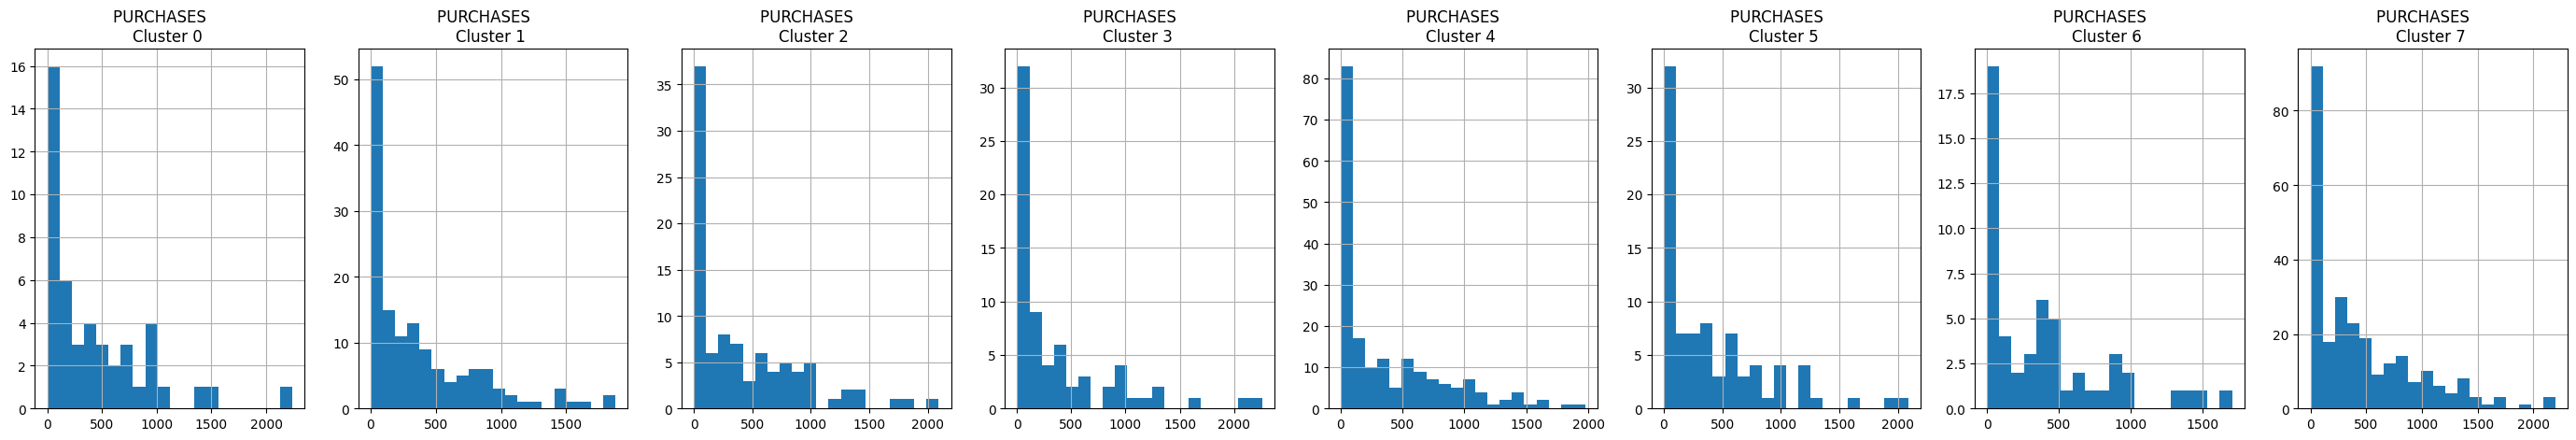

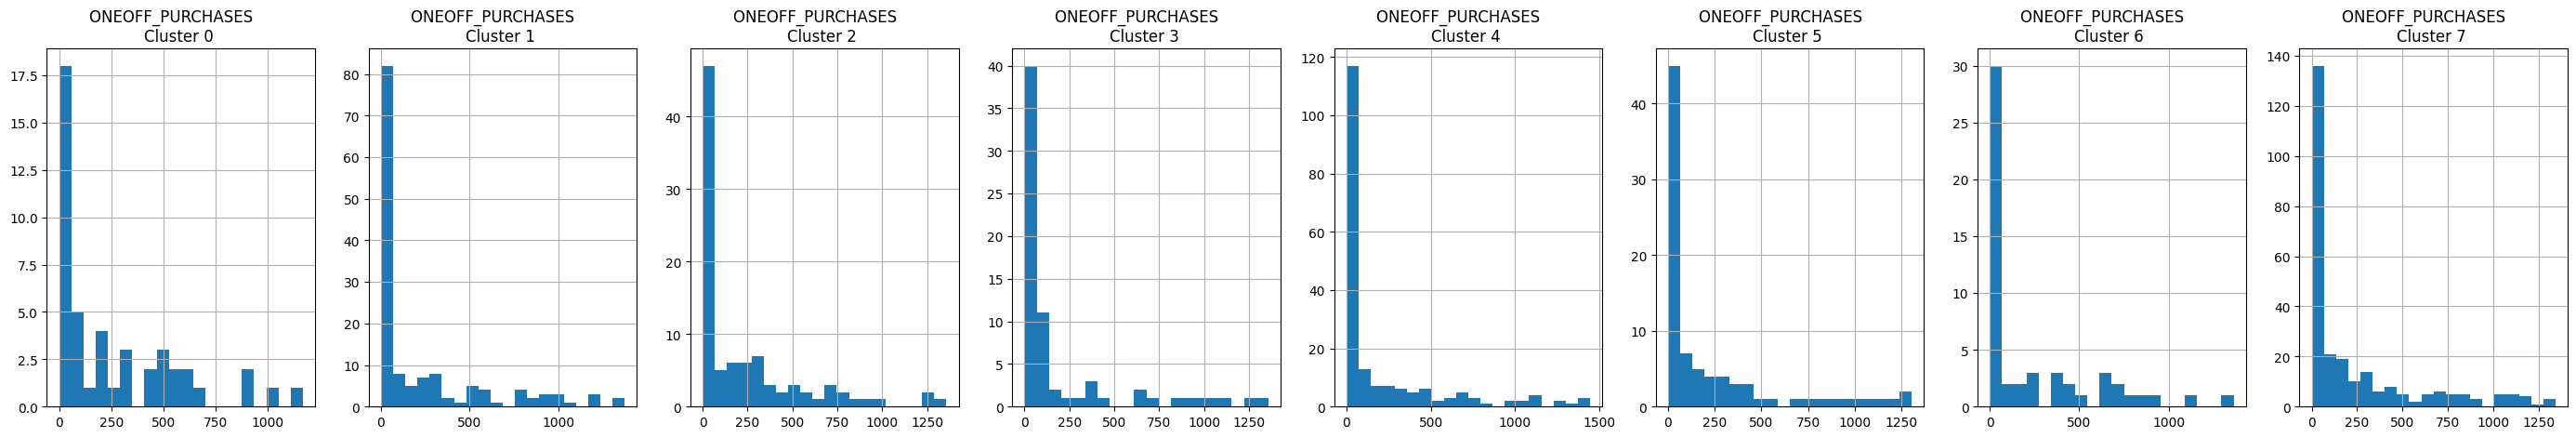

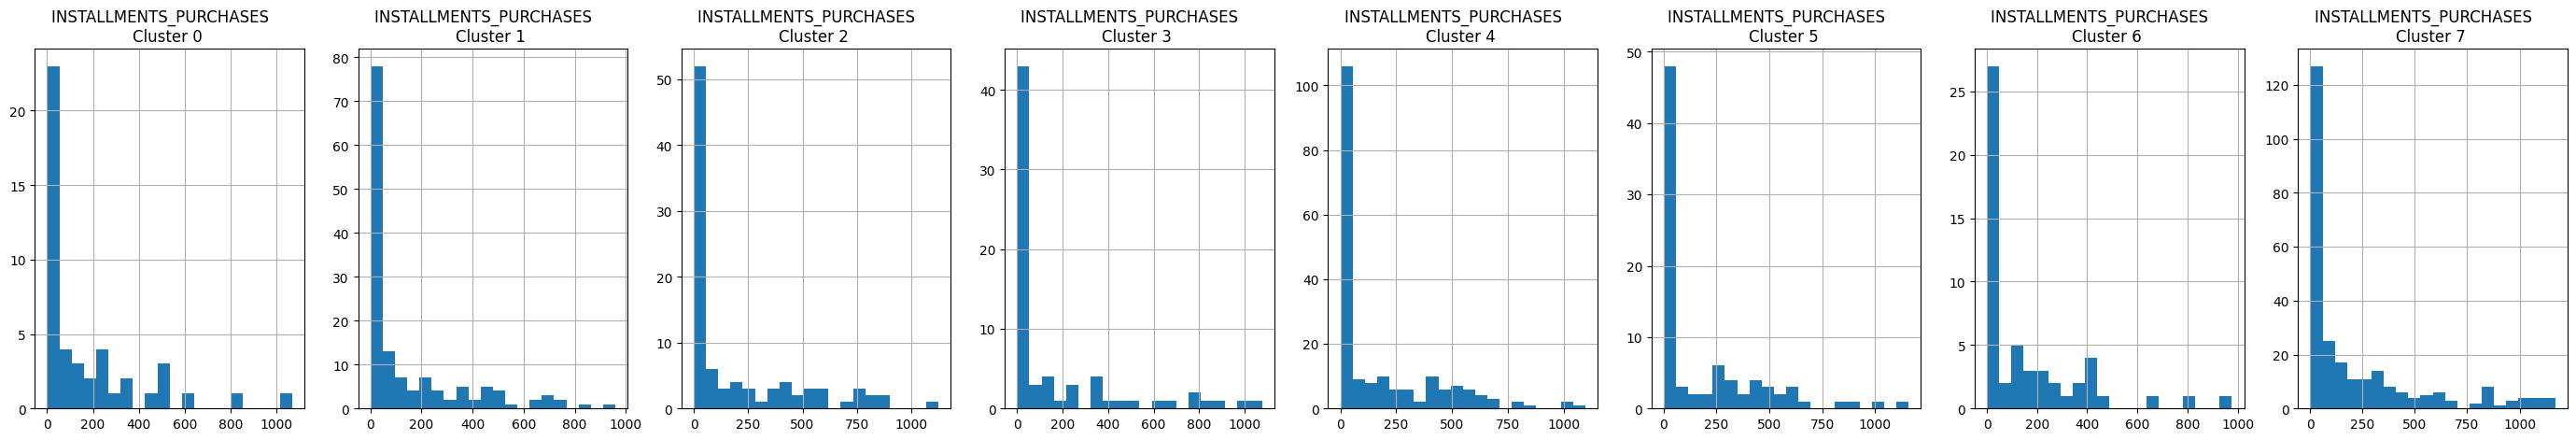

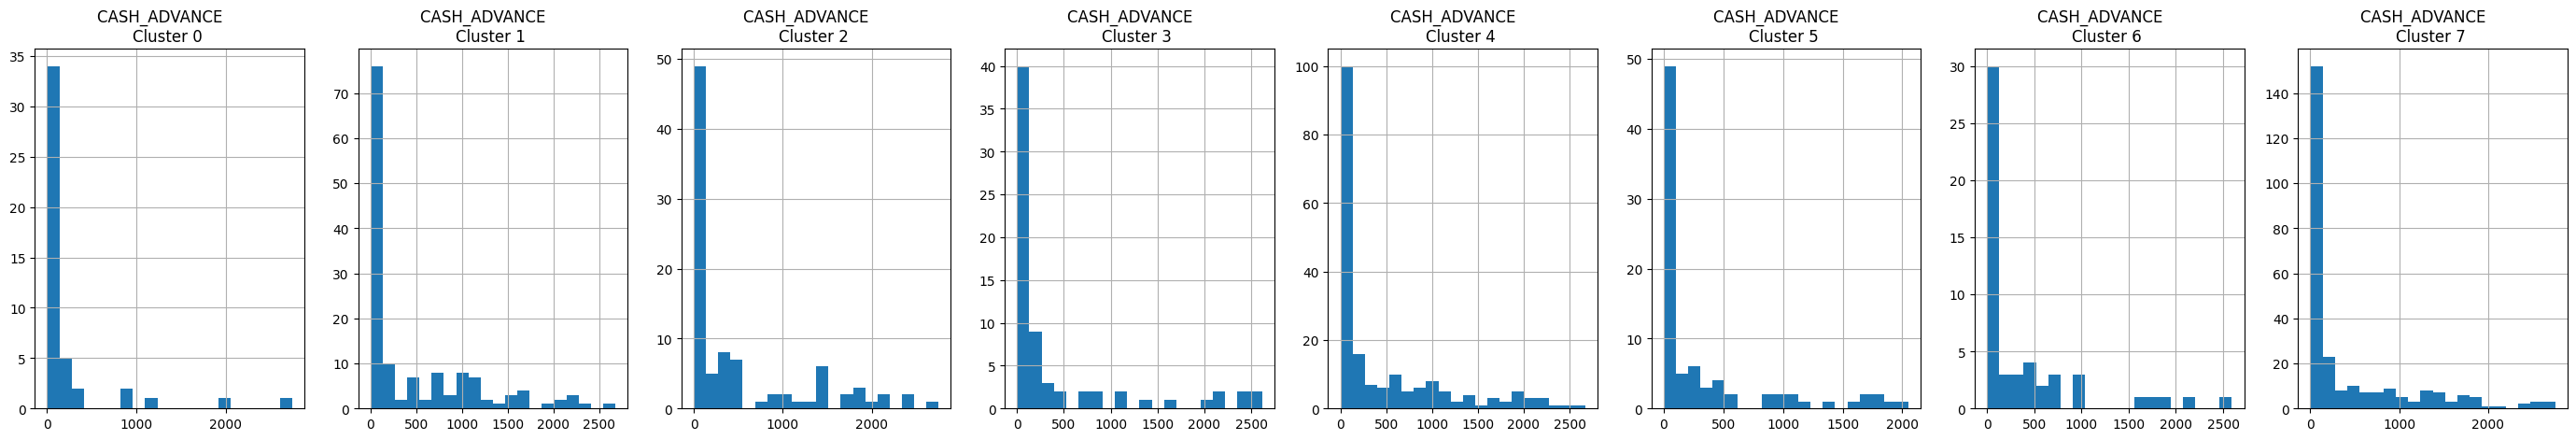

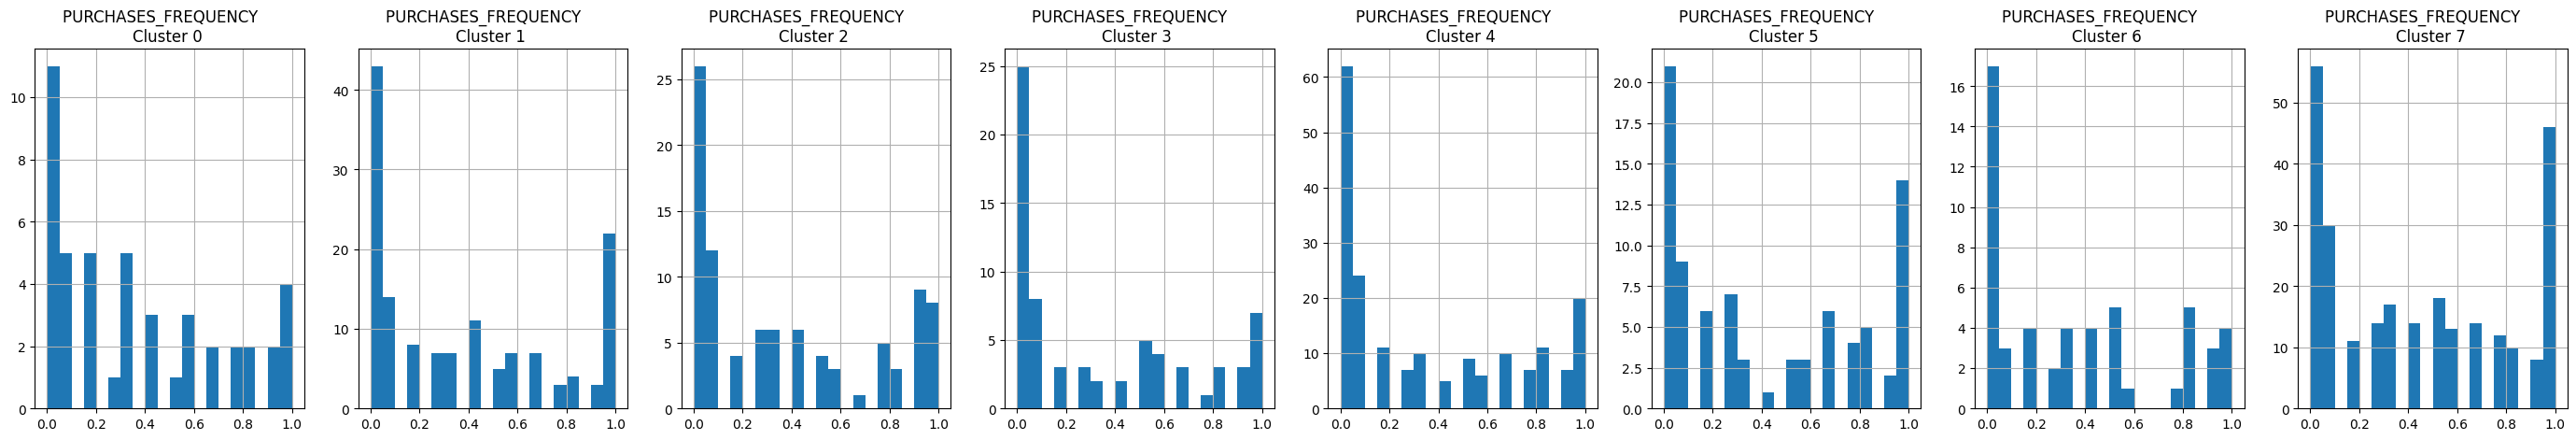

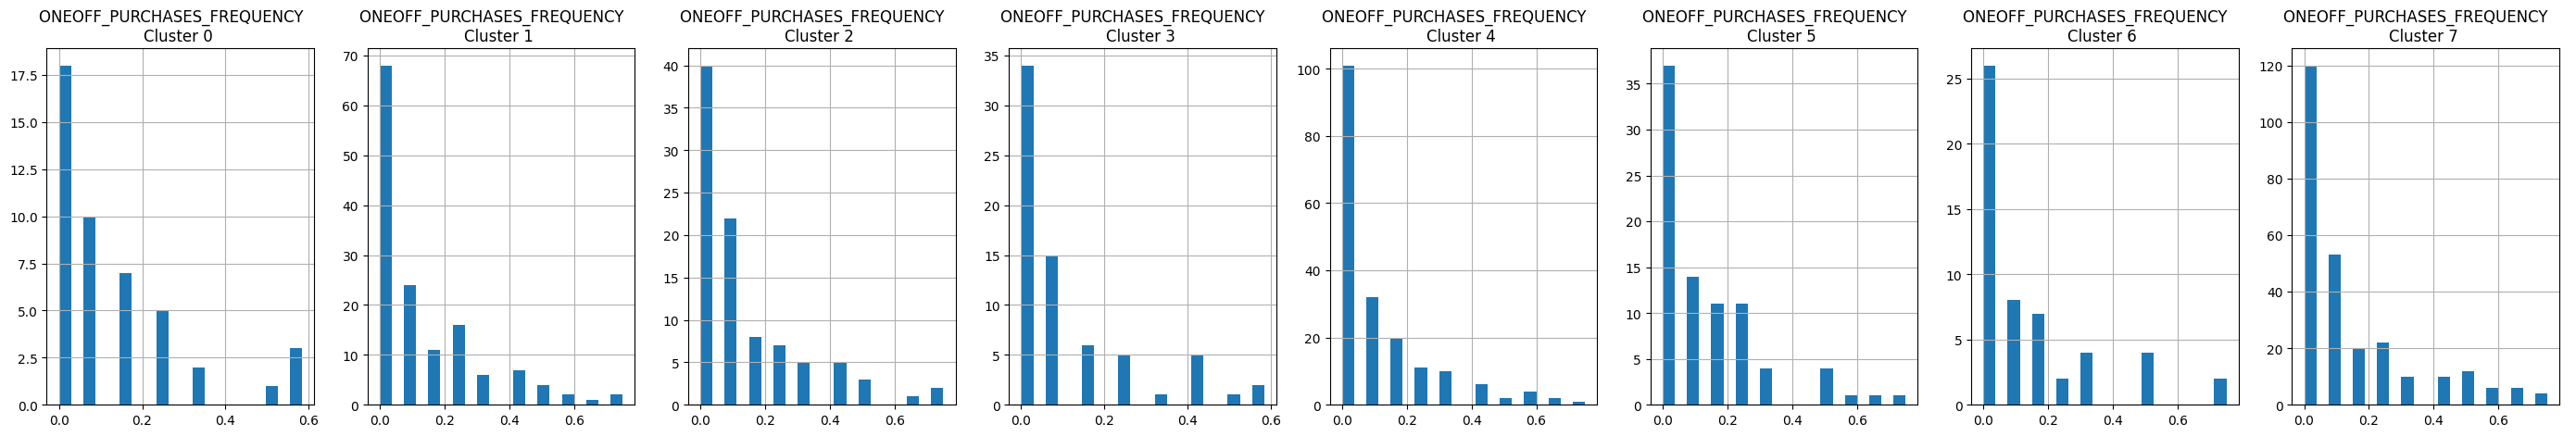

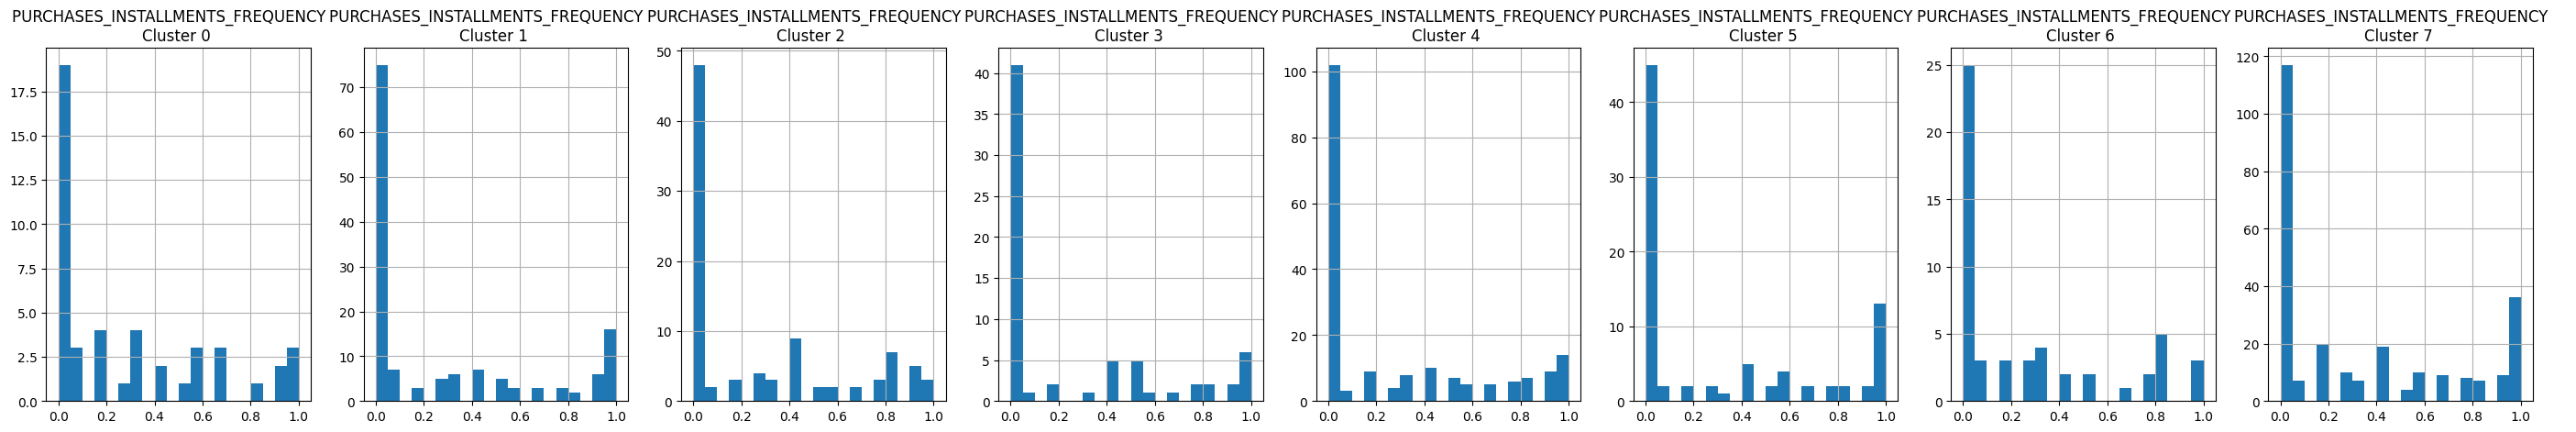

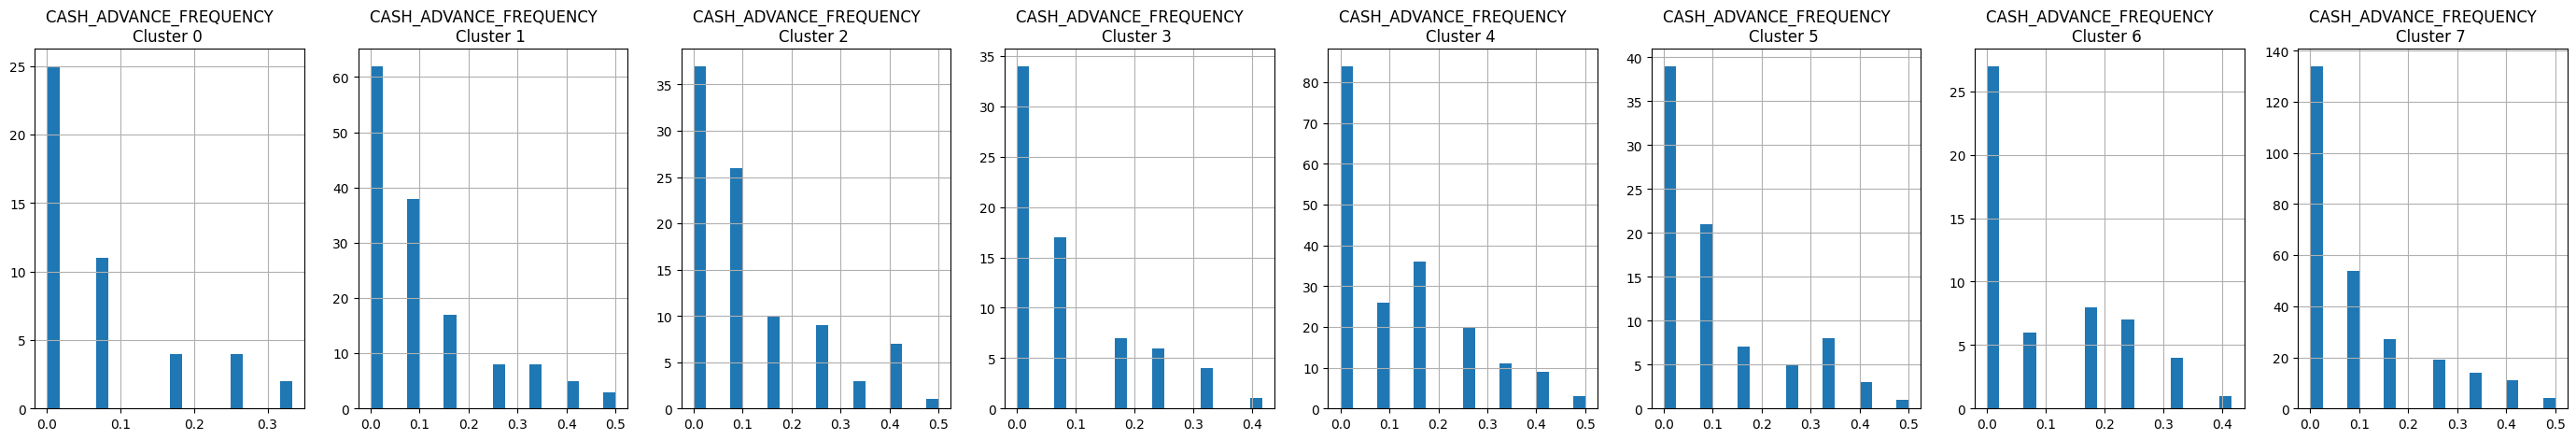

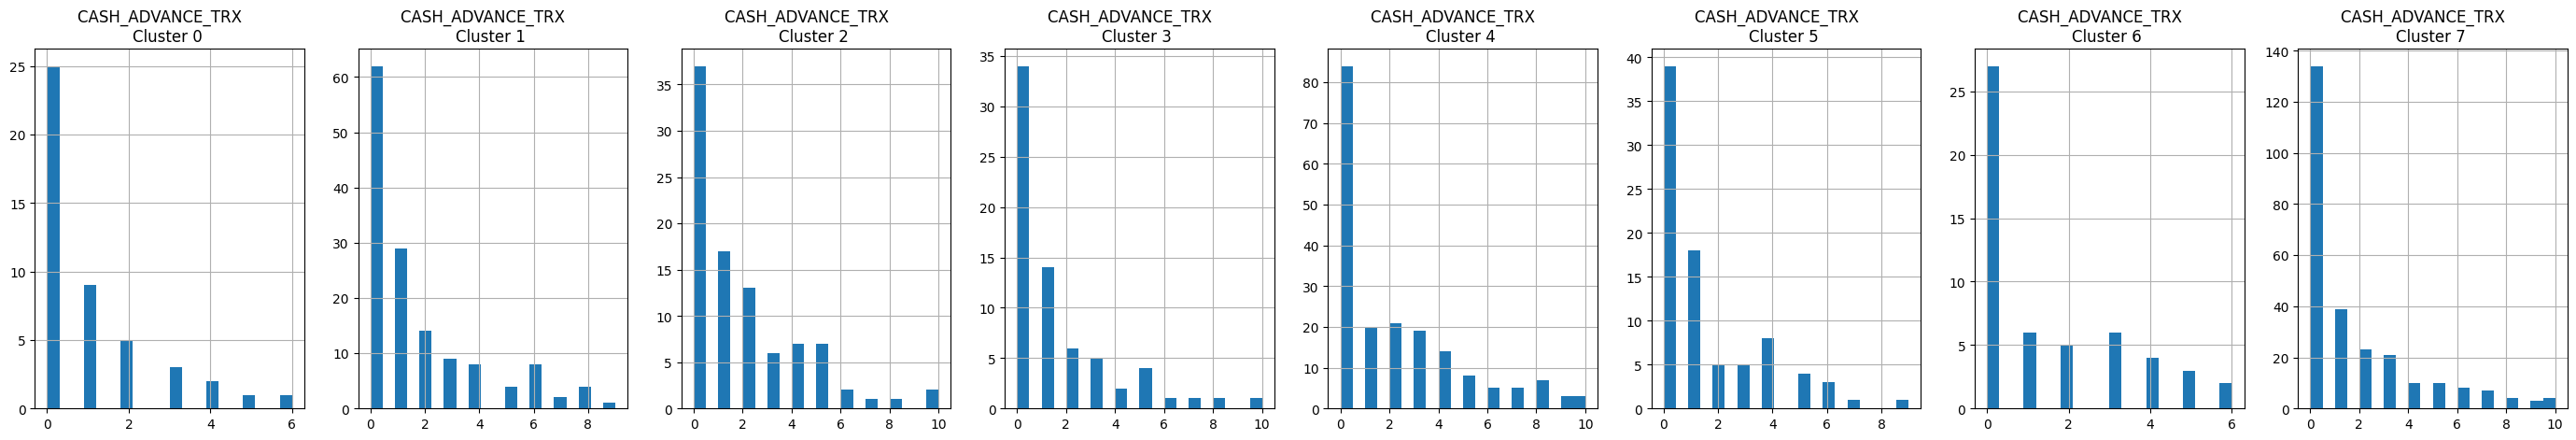

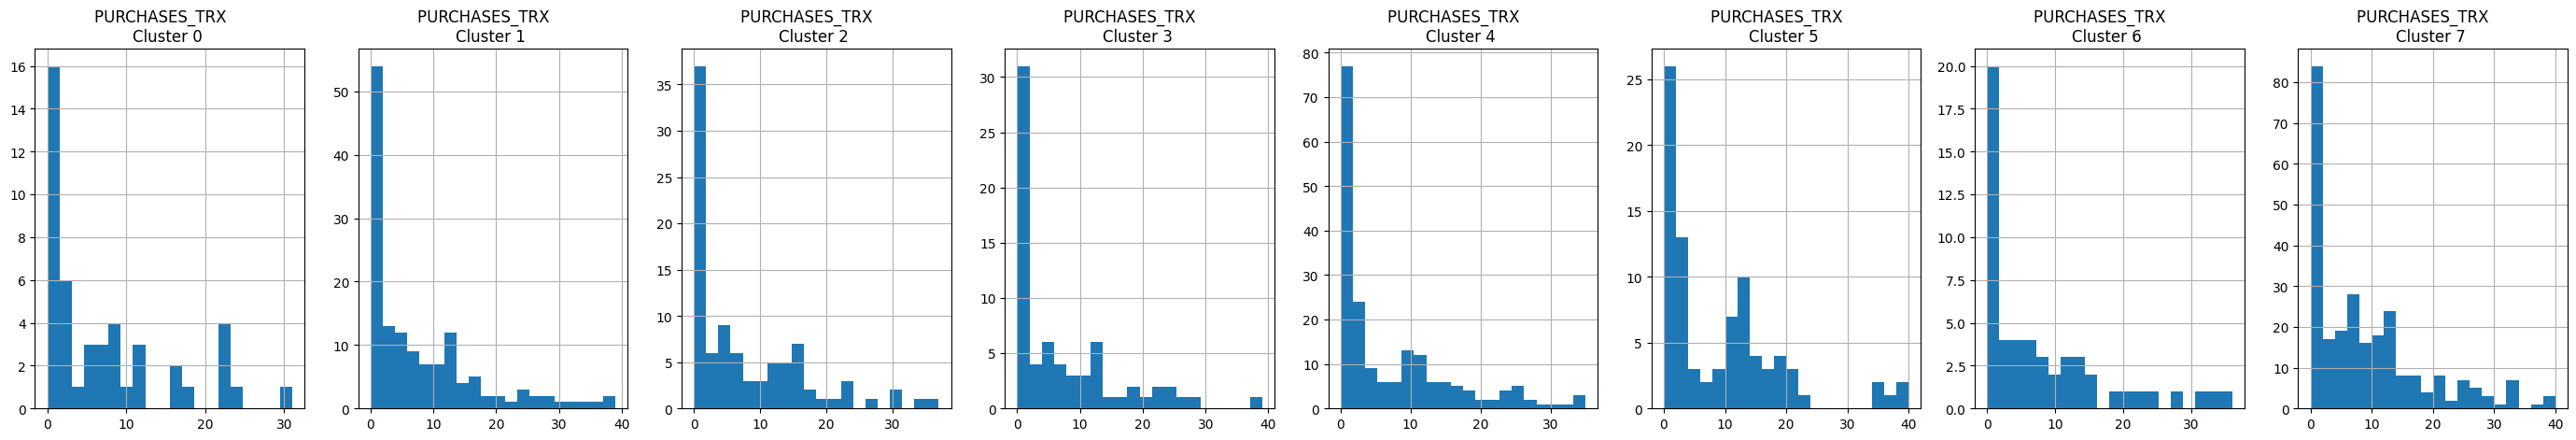

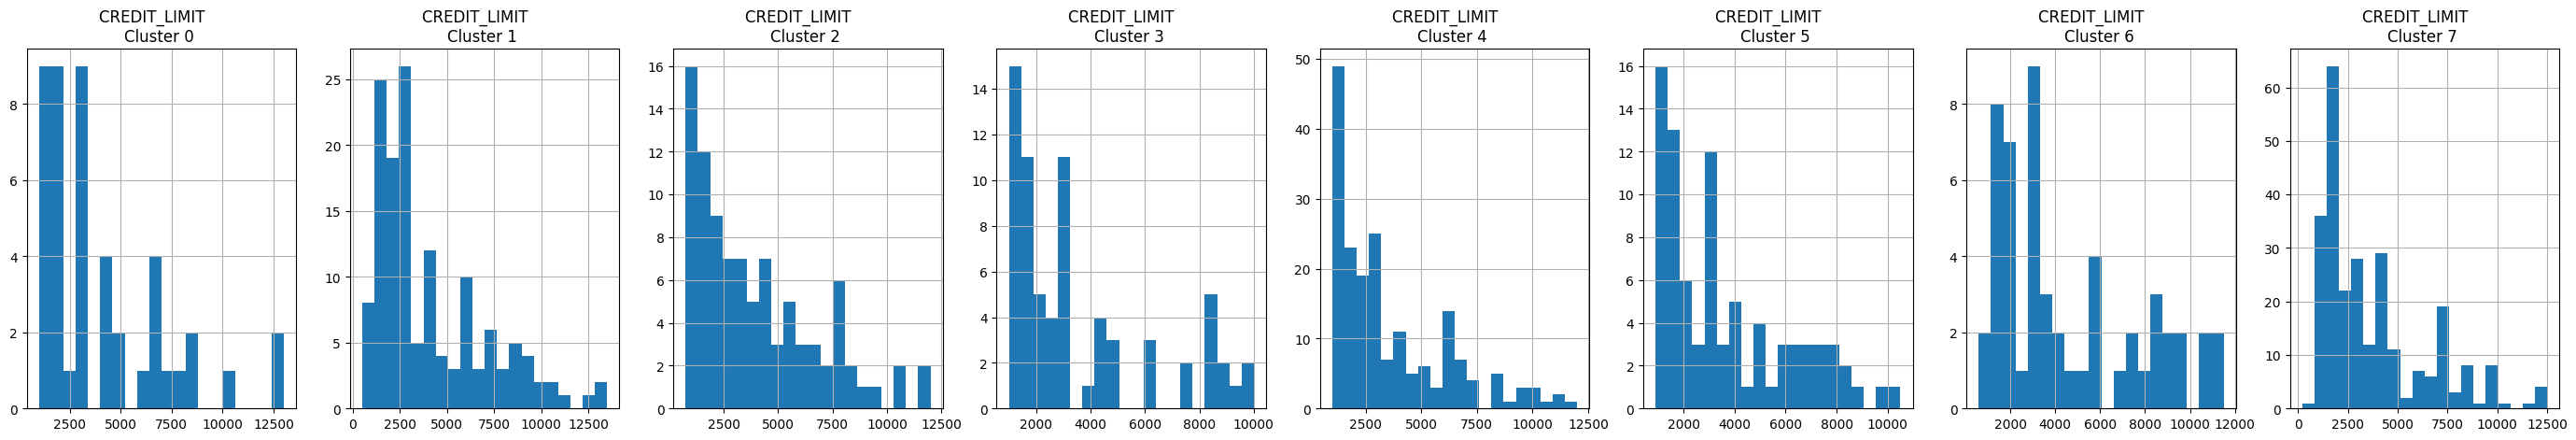

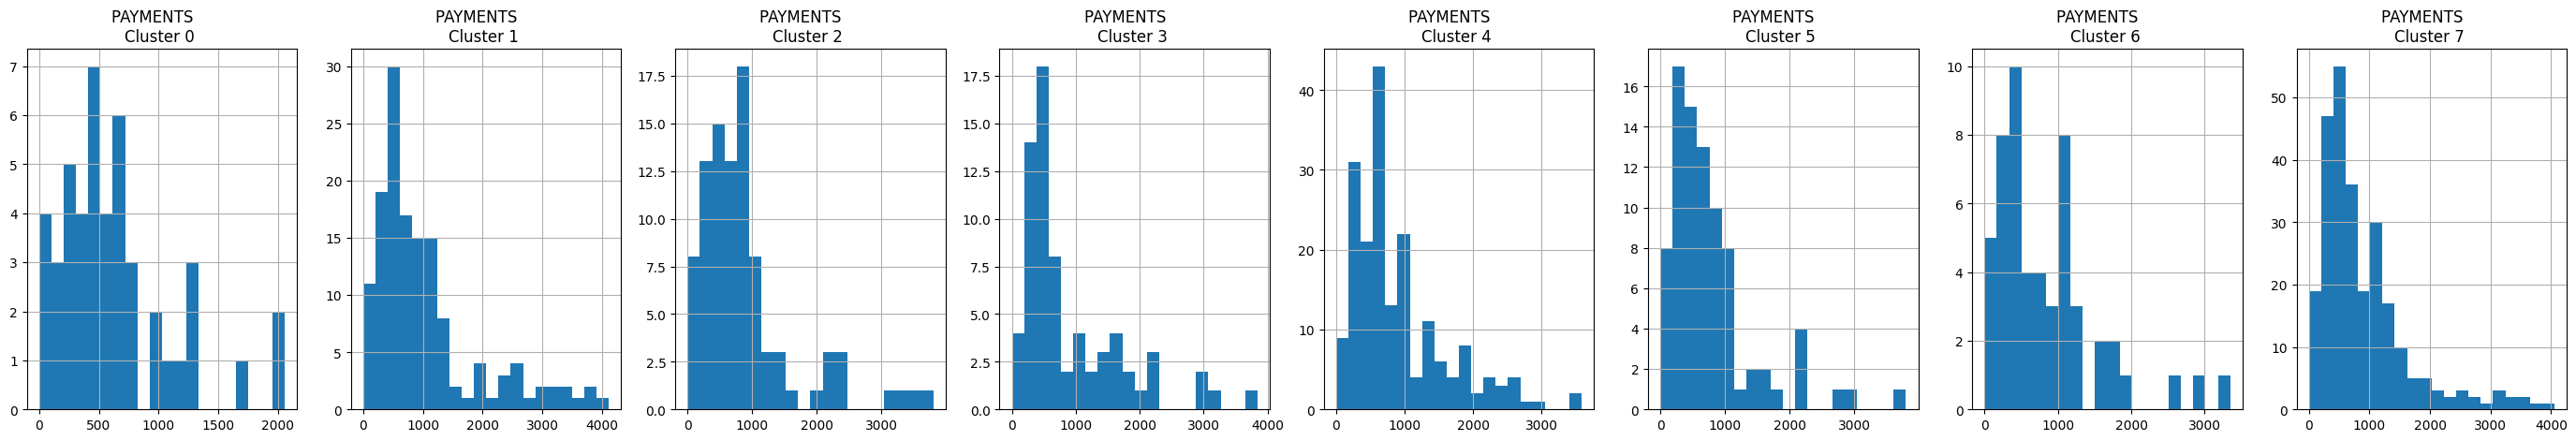

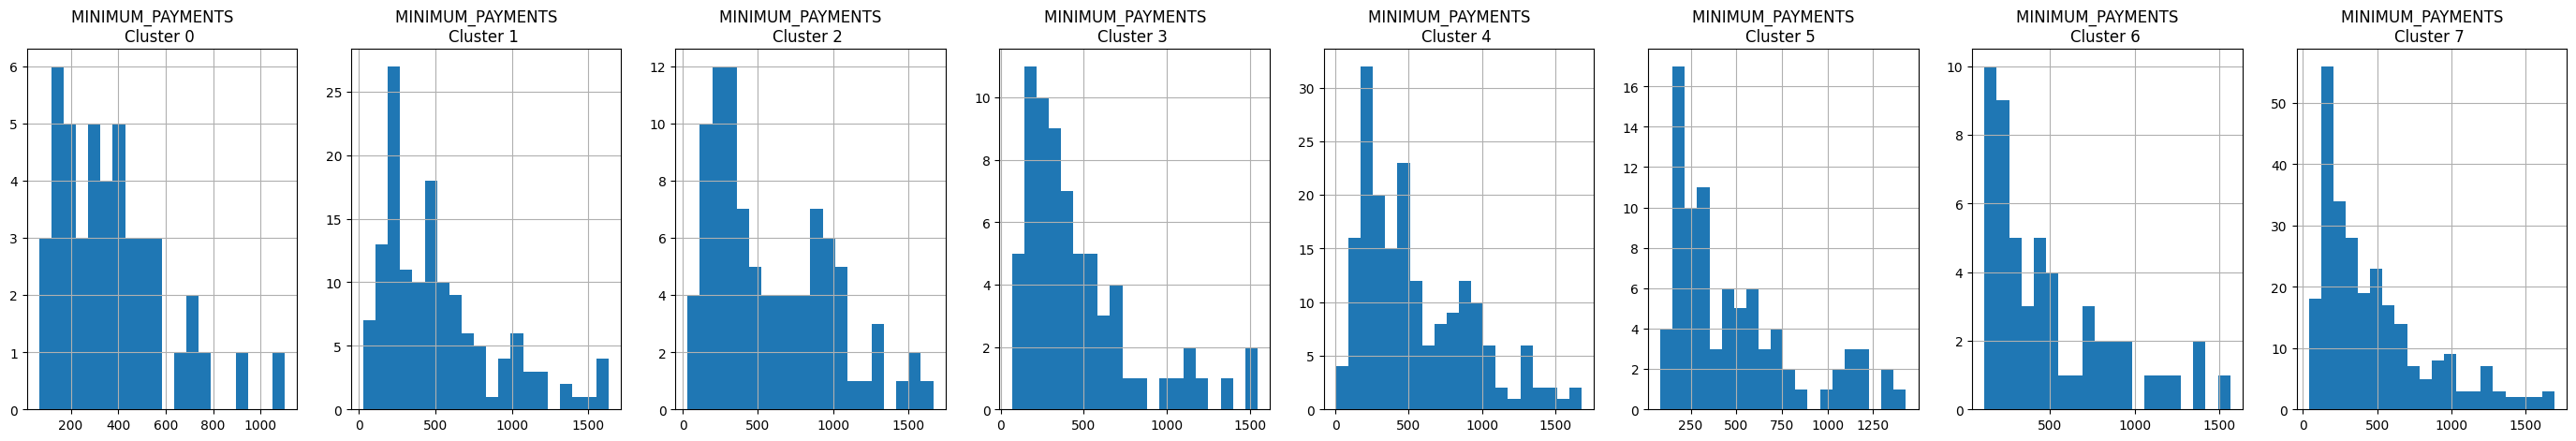

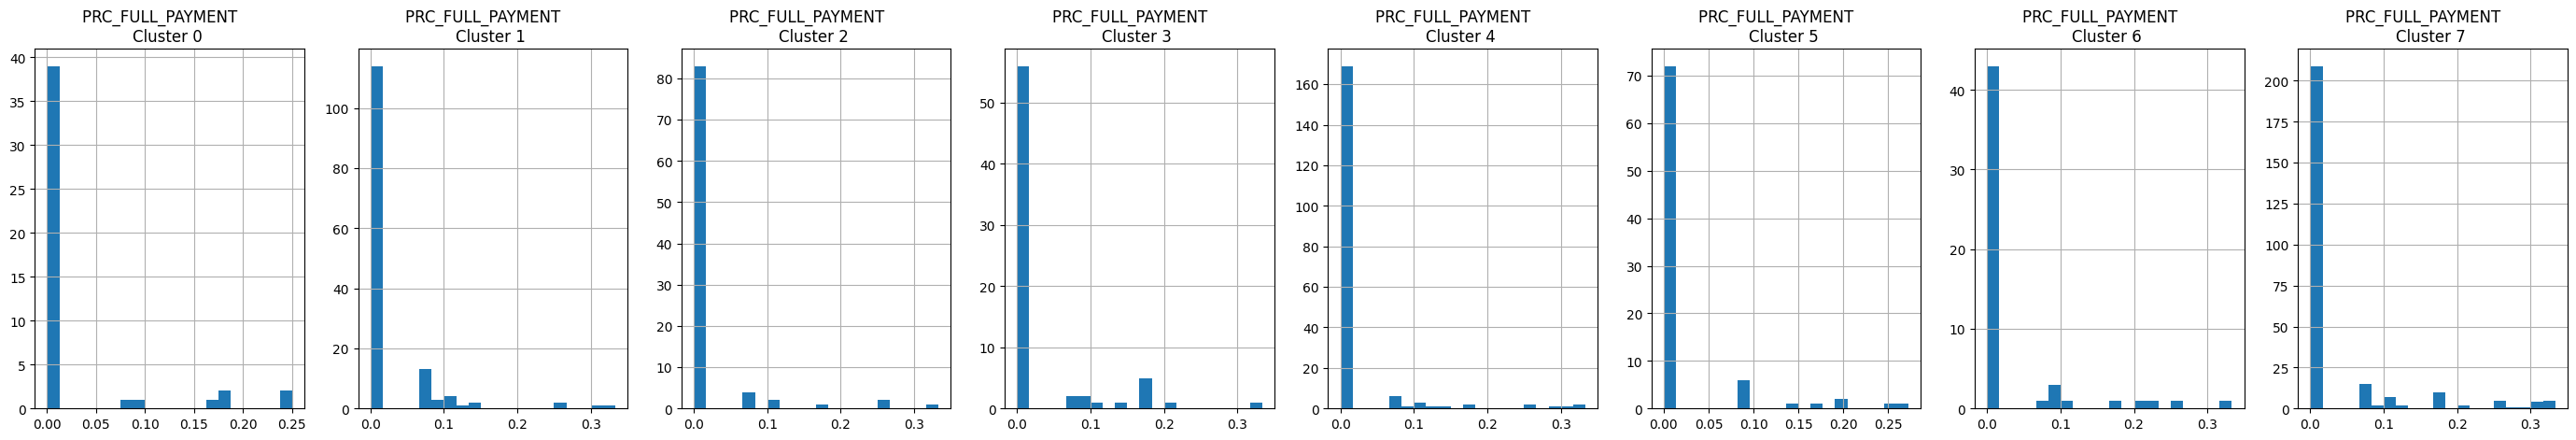

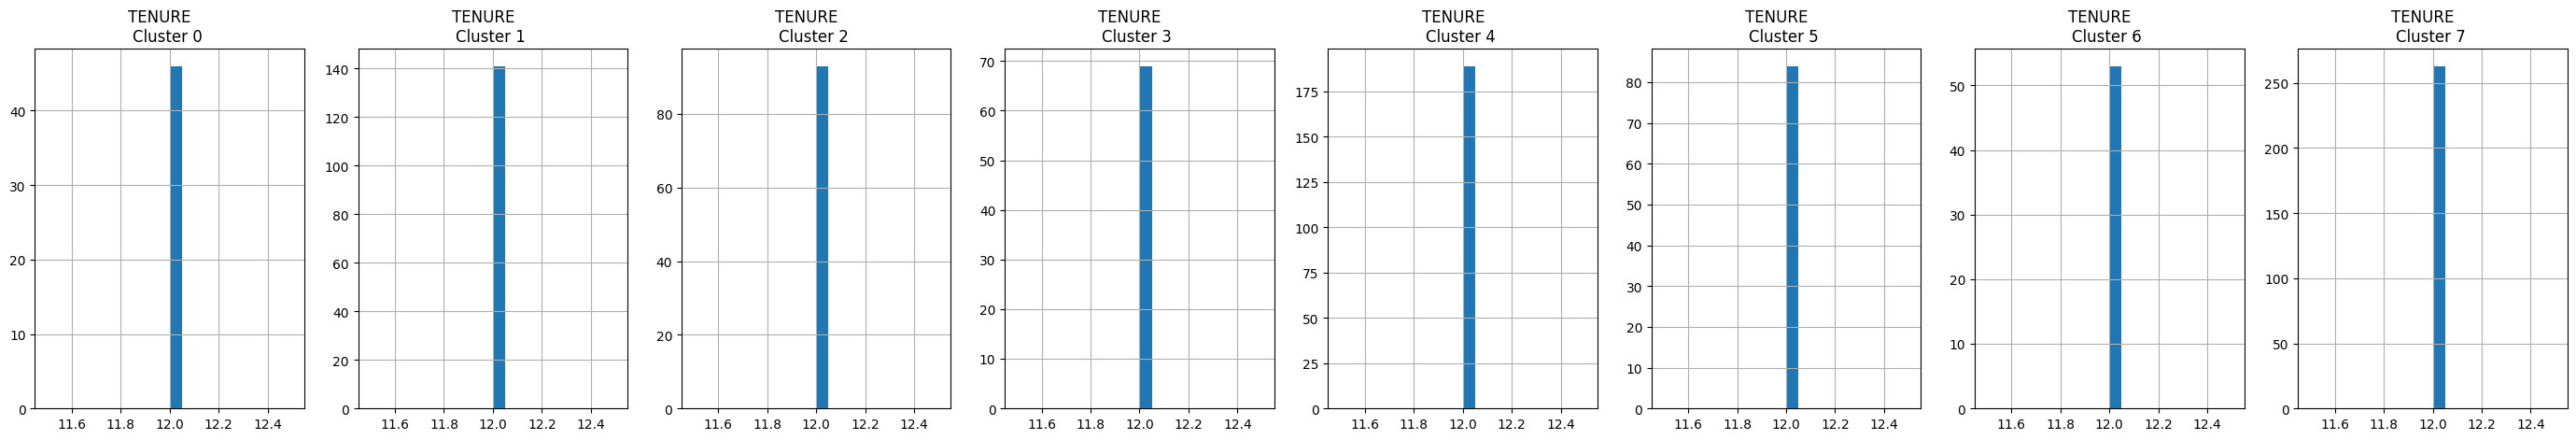

In [35]:
for i in data.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = data_cluster[data_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [36]:
silhouette_score_average = silhouette_score(data_scaled, kmeans.predict(data_scaled))
print(silhouette_score_average)

0.1838017315746133


# Dimensionality reduction

*As mentioned in the section where the correlations of the features in the dataset were calculated, we can eliminate some of the features that are highly correlated to each other.*

*We will use Principal Component Analysis (PCA) to reduce the dimensionality of the model while attempting to keep the original information. PCA tries to find a new set of features called components, such that these components consist of the uncorrelated given input features.*

In [37]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp

array([[-0.49811098, -2.95638647],
       [-0.99551955, -1.82580697],
       [ 1.96750171, -0.28992215],
       ...,
       [ 3.04669125, -2.34278953],
       [ 1.14595099, -2.70042062],
       [ 1.41992175,  0.43274943]])

In [38]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.498111,-2.956386
1,-0.995520,-1.825807
2,1.967502,-0.289922
3,1.100401,0.088934
4,-2.106281,0.325151


In [39]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.498111,-2.956386,0
1,-0.995520,-1.825807,7
2,1.967502,-0.289922,4
3,1.100401,0.088934,2
4,-2.106281,0.325151,5


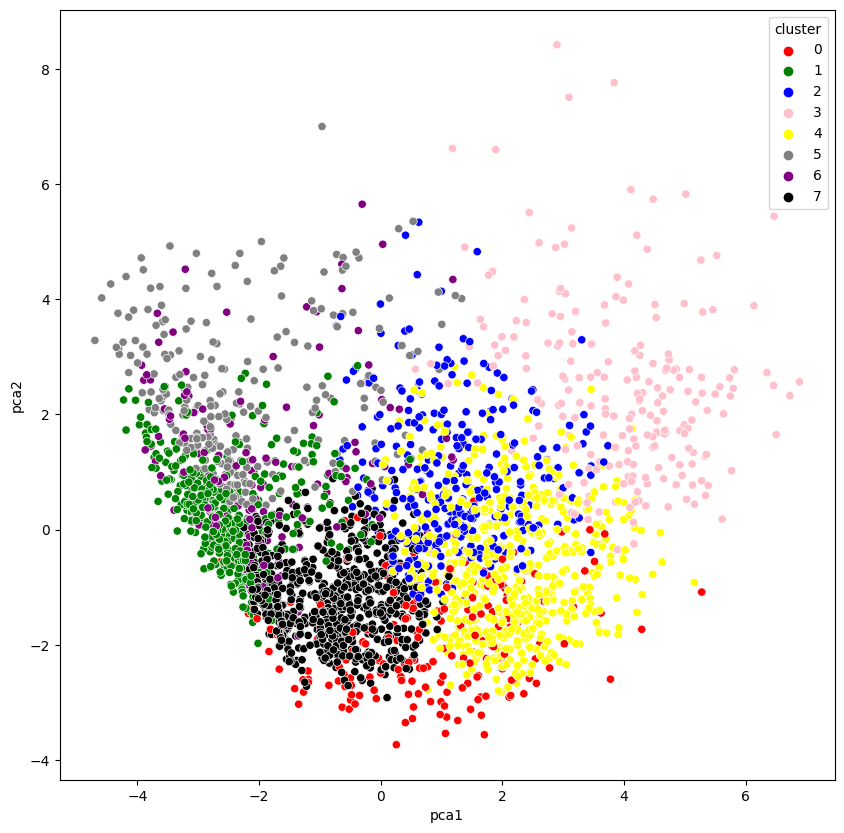

In [40]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [41]:
silhouette_score_average = silhouette_score(data_scaled, kmeans.predict(data_scaled))
print(silhouette_score_average)

0.1838017315746133


*Another method for reducing dimensionality is to use an autoencoder. It creates a bottleneck and forces the model to create a compressed version of the original output. This method works best where some features are highly correlated to each other.*

In [42]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [43]:
data_scaled.shape

(2986, 17)

In [44]:
autoencoder.fit(data_scaled, data_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
24/24 [==============================] - 3s 53ms/step - loss: 0.6972
Epoch 2/25
24/24 [==============================] - 1s 53ms/step - loss: 0.4484
Epoch 3/25
24/24 [==============================] - 1s 55ms/step - loss: 0.3720
Epoch 4/25
24/24 [==============================] - 1s 53ms/step - loss: 0.3253
Epoch 5/25
24/24 [==============================] - 1s 55ms/step - loss: 0.2923
Epoch 6/25
24/24 [==============================] - 2s 89ms/step - loss: 0.2721
Epoch 7/25
24/24 [==============================] - 2s 64ms/step - loss: 0.2516
Epoch 8/25
24/24 [==============================] - 1s 53ms/step - loss: 0.2381
Epoch 9/25
24/24 [==============================] - 1s 53ms/step - loss: 0.2261
Epoch 10/25
24/24 [==============================] - 1s 53ms/step - loss: 0.2149
Epoch 11/25
24/24 [==============================] - 1s 54ms/step - loss: 0.2034
Epoch 12/25
24/24 [==============================] - 1s 53ms/step - loss: 0.2010
Epoch 13/25
24/24 [==================

In [45]:
autoencoder.save_weights('autoencoder.h5')

In [46]:
pred = encoder.predict(data_scaled)

94/94 [==============================] - 0s 4ms/step


In [47]:
pred.shape

(2986, 10)

*It can be seen that the model is shrunk, and now there are ten columns(features) instead of the original 17. The rest of the process is the same as the previous one.*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

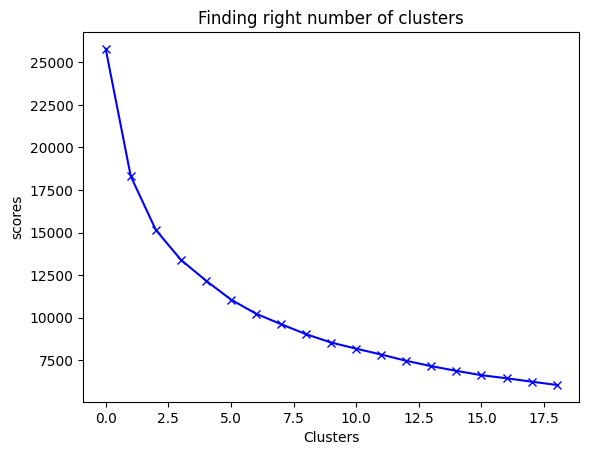

In [48]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

<ipython-input-49-559e8e4ea843>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r', label='Scores_1')
<ipython-input-49-559e8e4ea843>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g', label='Scores_2')


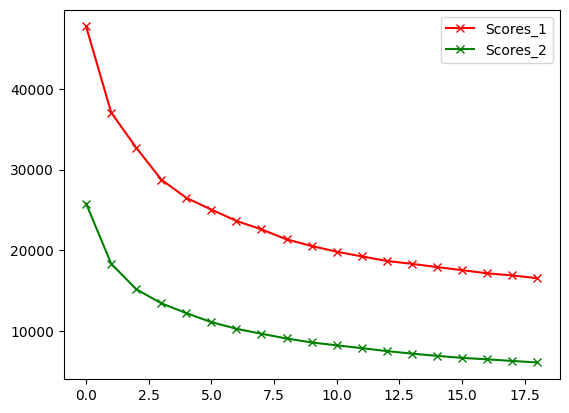

In [49]:
plt.plot(scores_1, 'bx-', color = 'r', label='Scores_1')
plt.plot(scores_2, 'bx-', color = 'g', label='Scores_2')
plt.legend()

*The comparison graph above shows the great change in the trends as in Scores_2, 4 or 5 clusters seem to be the best choice, using the elbow method.*

In [50]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
df_cluster_dr = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.0,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0,3.0
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.0,12.0,3.0
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.0,12.0,2.0
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,1.0,0.0,3000.0,805.647974,989.962866,0.0,12.0,0.0


In [52]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.732392,0.480335
1,-1.720665,-0.274759
2,0.283019,1.157824
3,1.936222,-0.351956
4,0.460840,-1.743723


In [53]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.732392,0.480335,0
1,-1.720665,-0.274759,0
2,0.283019,1.157824,2
3,1.936222,-0.351956,3
4,0.460840,-1.743723,3


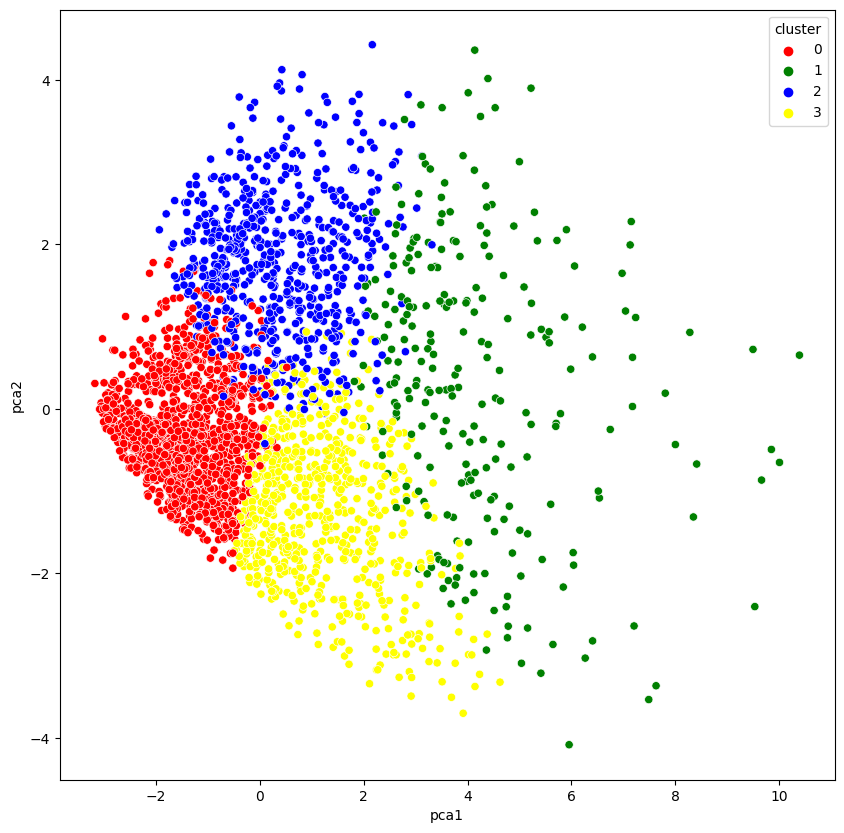

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

In [55]:
silhouette_score_average = silhouette_score(data_scaled, kmeans.predict(data_scaled))
print(silhouette_score_average)

0.1890108109459721


*Clearly, a better segmentation is performed than the previous one. However, some of the information might not be used as they were lost in dimensionality reduction.*

(Note 1 : The silhouette score measures the similarity of each point to its own cluster compared to other clusters, and the silhouette plot visualizes these scores for each sample.)

(Note 2 : The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.)

# Applying Agglomerative Hierarchy clustering

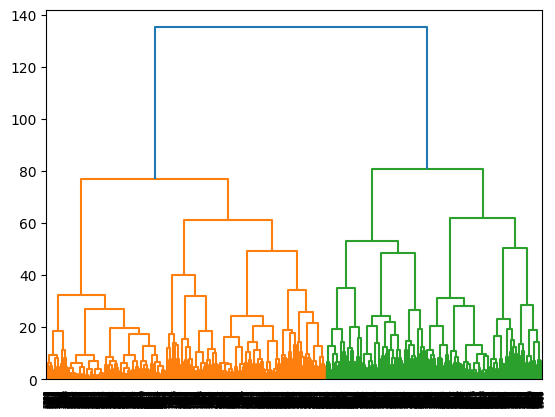

In [79]:
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

In [77]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


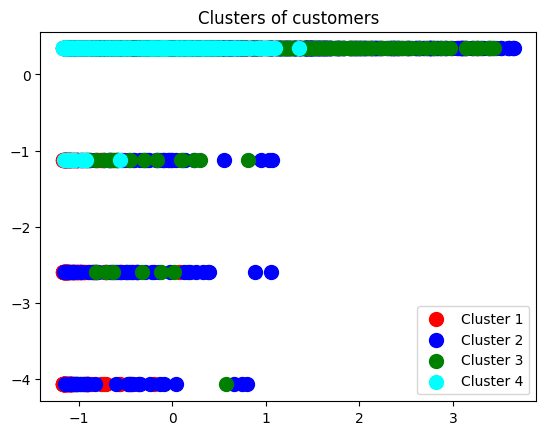

In [81]:
plt.scatter(data_scaled[y_hc == 0, 0], data_scaled[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_scaled[y_hc == 1, 0], data_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_scaled[y_hc == 2, 0], data_scaled[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_scaled[y_hc == 3, 0], data_scaled[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [80]:
silhouette_score_average = silhouette_score(data_scaled, hc.fit_predict(data_scaled))
print(silhouette_score_average)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.09697738831178383
